In [8]:
conflict = {
    "a_contents": "",
    "b_contents": "\nimport org.n52.sos.util.Constants;\nimport org.slf4j.Logger;\nimport org.slf4j.LoggerFactory;\n",
    "base_contents": "import org.n52.sos.util.Constants;\nimport org.n52.sos.w3c.xlink.W3CHrefAttribute;\nimport org.slf4j.Logger;\nimport org.slf4j.LoggerFactory;\n",
}
conflict = {
    'A': conflict['a_contents'],
    'B': conflict['b_contents'],
    'base': conflict['base_contents']
}
data = extract_feature(conflict)
sample = [        
    data['a_keyword_1'], 
    data['b_keyword_1'],
    data['a_keyword_2'],
    data['b_keyword_2'],
    data['a_exist'],
    data['b_exist'],
    data['base_exist'],
    data['a_edit_type'],
    data['b_edit_type'],
    data['ab_edit_type'],]
clf.predict([sample])

NameError: name 'extract_feature' is not defined

In [ ]:
import graphviz


dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=vec.get_feature_names(),  
                     filled=True, rounded=True,  
                     special_characters=True,
                     max_depth=5)  
graph = graphviz.Source(dot_data)  
graph.render('tree')

g:\compiler\anaconda\envs\skl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'tree.pdf'

In [ ]:
import jpype
import os

jvmPath = jpype.getDefaultJVMPath()
jarPath = os.path.join(os.path.abspath('G:/project/java/ASTExtract/out/artifacts/ASTExtract_jar/ASTExtract.jar'))
jpype.startJVM(jvmPath, '-ea', '-Djava.class.path=%s' % (jarPath))


In [ ]:
jpype.shutdownJVM()

In [ ]:
javaClass = jpype.JClass('nju.merge.ASTExtractor')
javaInstance = javaClass()
[a, b] = javaInstance.call('54_a.java', 94, 105)
print(a)
print(b)

11
6


In [ ]:
import re
regex = '[a-z|A-Z|_][a-z|A-Z|_|0-9]*'
s = 'fweaf_fewf_ffe'
if re.fullmatch(regex, s):
    print(1)
else:
    print(2)



1


In [ ]:
import json
import functools
with open('./abm1229.json', 'r', encoding='utf-8') as file:
    confdict = json.load(file)
    confs = confdict['conf']
    uk = sum([1 for conf in confs if conf['a_kw1'] == 'empty1' or conf['b_kw1'] == 'empty1'])
    print(uk)
    print(uk/len(confs))
    

142
0.09779614325068871


In [ ]:
# trival case 即ab base都是空或者tab 换行

def is_trivial(conf):
    tmp_str = conf['A'] + conf['B'] + conf['base']
    for i in range(len(tmp_str)):
        if tmp_str[i] != ' ' and tmp_str[i] != '\n':
            return False
    return True


with open('./abm1226.json', 'r', encoding='utf-8') as file:
    confdict = json.load(file)
    confs = confdict['conf']
    uk = sum([1 for conf in confs if is_trivial(conf)])
    print(uk)
    print(uk/len(confs))
    

174
0.00266352350482955


In [2]:
import json

# aosp:{'total': 17120, 'A': 12895, 'B': 858, 'N': 1338, 'not_found': 2029}
# c5:{'total': 58559, 'rem-b-comb': 11762, 'A': 10652, 'comb': 6600, 'new': 11802, 'B': 10364, 'concat': 7373}

count = {
    'total': 0,
    # 'A' : 0,
    # 'B' : 0,
    # 'new' : 0,
    # 'remb' : 0,
    # 'concat': 0,
}
with open('./c5.json', 'r', encoding='utf-8') as j:
    conf = json.load(j)['conf']
    for c in conf:
        label = c['label']
        count['total'] += 1
        if not label in count.keys():
            count[label] = 0
        else:
            count[label] += 1
                
print(count)



{'total': 58559, 'rem-b-comb': 11762, 'A': 10652, 'comb': 6600, 'new': 11802, 'B': 10364, 'concat': 7373}


In [14]:
import json

conf_list = {}
conflict_path = 'G:/merge/fse2022/automated-analysis-data/Java/'
for home, dirs, files in os.walk(conflict_path):
    for filename in files:
        if filename.endswith('metadata.json'):
            with open(os.path.join(home, filename), 'r', encoding='utf-8') as f:
                conflict =  json.load(f)
                if not conflict['repo'] in conf_list.keys():
                    conf_list[conflict['repo']] = 1
                else:
                    conf_list[conflict['repo']] += 1

repo_list = [(name, nums) for name, nums in conf_list.items()]
print(sorted(repo_list, key=lambda x : x[1])[-5:])
                    

[('https://github.com/elastic/elasticsearch', 214), ('https://github.com/spring-projects/spring-boot', 217), ('https://github.com/micdoodle8/Galacticraft', 241), ('https://github.com/apache/sis', 257), ('https://github.com/52North/SOS', 326)]


In [17]:
r_list = [repo_name for (repo_name, nums) in repo_list]
with open('./repolist.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps({'repolist': r_list}))


In [16]:
with open('./abm12.json', 'r', encoding='utf-8') as f:
    confs = json.load(f)['conf']
    confs = [conf for conf in confs if conf['repo'] == 'https://github.com/52North/SOS']
    with open('./sos.json', 'w', encoding='utf-8') as j:
        j.write(json.dumps({'conf': confs}))

In [10]:
from functools import reduce
a = ['a', 'v','v']
a_f = reduce(lambda x,z : x + len(z), a, 0)
print(a_f)

3


In [13]:
import json
with open('./c5.json', 'r', encoding='utf-8') as f:
    confs = json.load(f)['conf']
    c_confs = [1 for conf in confs if 'Copyright' in conf['A']]
    print(sum(c_confs))
    print(sum(c_confs)/ len(confs))
    

131
0.09244883556810163


In [3]:
import json
def filter_blank(lines):
    def is_blank(s):
        if s == '':
            return True
        for i in range(len(s)):
            if s not in [' ', '\n', '\t']:
                return False
        return True
    return [line for line in lines if not is_blank(line)]

count = 0
with open('./c5.json', 'r', encoding='utf-8') as f:
    confs = json.load(f)['conf']
    for conf in confs:
        if conf['label'] != 'A' and  conf['label'] != 'B':
            a = filter_blank(conf['A'])
            b = filter_blank(conf['B'])
            res = filter_blank(conf['resolution'])
            if a == res or b == res:
                conf['label'] = 'A' if a == res else 'B'
                count += 1
    with open('./c5_1.json', 'w', encoding='utf-8') as c:
        c.write(json.dumps({'conf':confs}))
#c5_1去除了空冲突
print(count)

874


C:\Users\ASUKA\AppData\Local\Temp\ipykernel_38244\3213964046.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


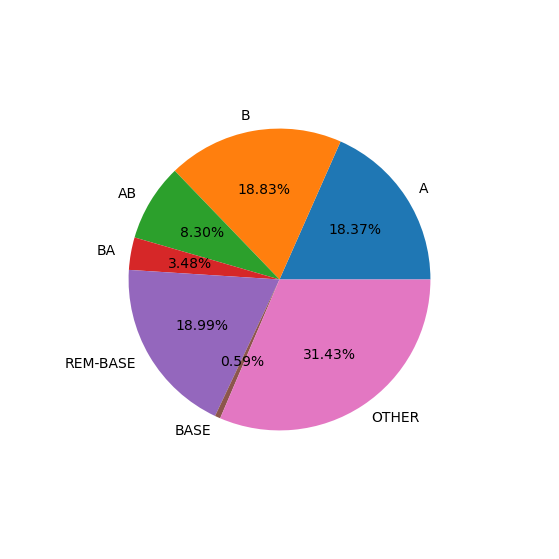

: 

In [20]:
import matplotlib.pyplot as plt
import matplotlib
label = ['A', 'B', 'AB', 'BA', 'REM-BASE', 'BASE',  'OTHER']
data = [11939, 12241, 5396, 2261, 1678+4441+2132+4093, 384, 20429]

fig, ax = plt.subplots(figsize=(14,7))

ax.pie(data, 
    labels = label,
    autopct='%.2f%%',
    radius=0.7,)
# plt.legend()
fig.show()

In [2]:
import json
def count_line(lines):
    return len(str.splitlines(lines))

with open('./c5.json', 'r', encoding='utf-8') as f:
    confs = json.load(f)['conf']
    for conf in confs:
        conf['a_region_size'] = count_line(conf['A'])
        conf['b_region_size'] = count_line(conf['B']) - 1
        conf['base_region_size'] = count_line(conf['base'])
        conf['conf_chunk_size'] = count_line(conf['base']) + conf['a_region_size'] + conf['b_region_size']
    
    with open('./c5_2.json', 'w', encoding='utf-8') as c:
        c.write(json.dumps({'conf':confs}))


In [1]:
a =[1,2,3,4,5,6]
print(a[:2])
print(a[2:])

[1, 2]
[3, 4, 5, 6]


In [30]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

repos = []
conflict_path = 'G:/data/1/'
for home, dirs, files in os.walk(conflict_path):
    for filename in files:
        if filename.endswith('training.csv'):
            with(open(os.path.join(home, filename), 'r', encoding='utf-8')) as f:
                labels = {}
                data = pd.read_csv(f)
                data = data.loc[:, 'developerdecision']
                for l in data:
                    if l in labels.keys():
                        labels[l] += 1
                    else:
                        labels[l] = 0
                labels = {key : round(nums/sum([num for num in labels.values()]), 3) for key, nums in labels.items()}
                labels['repo'] = filename
                repos.append(labels)
print(len(repos))


23


TypeError: 'str' object is not callable

In [31]:
import functools

for repo in sorted(repos, key=functools.cmp_to_key(lambda x,y: x['Version 1'] > y['Version 1'])):
    print(repo)

{'Version 2': 0.18, 'Combination': 0.271, 'Version 1': 0.31, 'Manual': 0.222, 'ConcatenationV2V1': 0.008, 'ConcatenationV1V2': 0.007, 'None': 0.003, 'repo': 'alexo__wro4j-training.csv'}
{'Version 1': 0.929, 'Combination': 0.01, 'ConcatenationV2V1': 0.002, 'Manual': 0.019, 'Version 2': 0.04, 'None': 0.0, 'repo': 'alkacon__opencms-core-training.csv'}
{'Version 1': 0.744, 'Version 2': 0.085, 'Manual': 0.062, 'Combination': 0.079, 'ConcatenationV2V1': 0.01, 'ConcatenationV1V2': 0.019, 'None': 0.002, 'repo': 'android__platform_frameworks_base-training.csv'}
{'Combination': 0.066, 'Version 2': 0.159, 'Version 1': 0.688, 'Manual': 0.072, 'ConcatenationV1V2': 0.006, 'ConcatenationV2V1': 0.007, 'None': 0.002, 'repo': 'apache__accumulo-training.csv'}
{'Version 2': 0.516, 'Combination': 0.001, 'Version 1': 0.439, 'Manual': 0.044, 'repo': 'apache__directory-server-training.csv'}
{'Combination': 0.192, 'Manual': 0.184, 'Version 1': 0.283, 'Version 2': 0.29, 'ConcatenationV1V2': 0.041, 'Concatenatio